# Title: "SVM Classification - Breast Cancer Dataset"

## Learning Objective

## Introduction to SVM

## Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Loading the Dataset

In [2]:
data = load_breast_cancer()

x = data.data[:, [0, 1]]
y = data.target

In [3]:
data.data.shape

(569, 30)

## Splitting the Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

## Feature Scaling

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Training the SVM Classifier

In [7]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

## Evaluating the Model

In [8]:
y_pred = svm_classifier.predict(x_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.90
              precision    recall  f1-score   support

   malignant       0.90      0.84      0.87        43
      benign       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



## Plotting the Decision Boundary

In [11]:
def plot_decision_boundary(X, y, model, scaler):
  h = 0.02 # Step size for mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict on mesh points
  Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)
  # Plot decision boundary and data points
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.xlabel(data.feature_names[0])
  plt.ylabel(data.feature_names[1])
  plt.title('SVM Decision Boundary')
  plt.show()

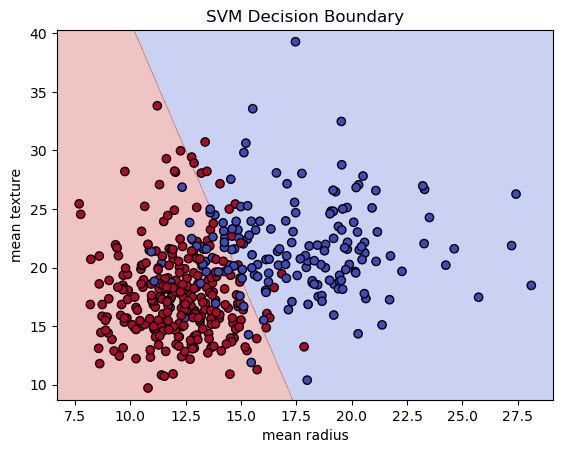

In [12]:
plot_decision_boundary(x_train, y_train, svm_classifier, scaler)